#Task 1
#Prediction using Supervised ML


##Importing library and data

In [ ]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

In [ ]:
# Import data
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print("Dataset imported successfully...")

Dataset imported successfully...


In [ ]:
# Calling dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# Checking number of rows and columns in the data set
print('\nNumber of rows and columns in the data set: ',df.shape)


Number of rows and columns in the data set:  (25, 2)


In [ ]:
# Describe our dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

##Visualizing data

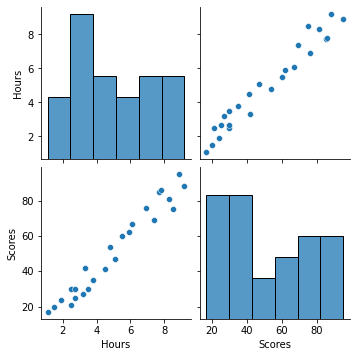

In [ ]:
sns.pairplot(df)
plt.show()

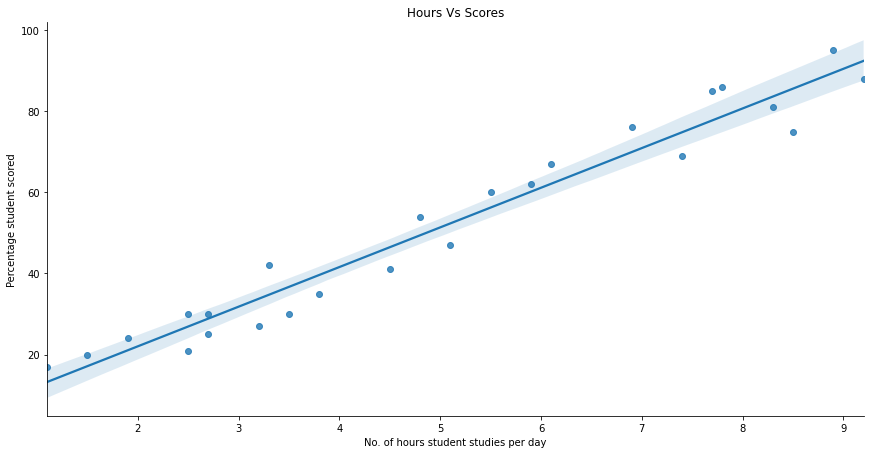

In [ ]:
# for our visualization purpose will fit line using seaborn library for hours as independent variable and score as dependent variable
sns.lmplot(x='Hours',y='Scores',data=df,aspect=2,height=6)
plt.xlabel('No. of hours student studies per day')
plt.ylabel('Percentage student scored')
plt.title('Hours Vs Scores');

##Data Spliting

In [ ]:
#Preparing the data
#The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  
print("Data divided into X and y")

Data divided into X and y


In [ ]:
#Split this data into training and test sets by using Scikit-Learn's built-in train_test_split() method
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 
print("Data split into training and testing")

Data split into training and testing


##Data Training and Prediction

In [ ]:
# Training the data by using Scikit-Learn's linear_model i.e LinearRegression 
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete....")

Training complete....


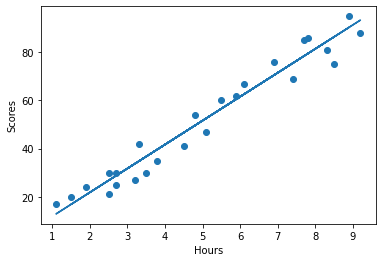

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [ ]:
print(X_test) # Testing data - In Hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [ ]:
# Making predictions
y_pred = regressor.predict(X_test) # Predicting the scores

In [ ]:
# Comparing Actual vs Predicted
dp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dp 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


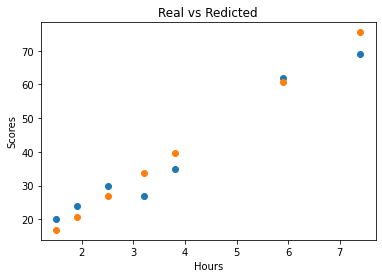

In [ ]:
# Real and Predicted Value 
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Real vs Redicted')

plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)

##What will be predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
# You can also test with your own data
hrs = [[9.25]]
#hrs = hrs.reshape(1, -1)
own_pred = regressor.predict(hrs)

In [ ]:
print("No of Hours = {}".format(hrs))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.89272889341652


### Evaluating the model

In [ ]:
# MAE
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.130879918502482


In [ ]:
# R Squared
from sklearn import metrics 
print('R-Squared Error:', metrics.r2_score(y_test, y_pred))

R-Squared Error: 0.9367661043365056


In [ ]:
#MSE
from sklearn import metrics
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 20.33292367497996
